# **Artificial Intelligence, Project 1,** 
### *Mobin Roohi - Student ID: 610300060*
***
This notebook will cover solution for problems 1 and 2.

# <span style="color:RGB(30, 190, 250)">Problem 1: Reward Modification

### **<span style="color:RGB(30, 190, 250)">1.a.** 

Using the bellman equation, we have the following for the optimal value function:

$$V_1(s) = E[r(s, \pi_1(s))] + \gamma E_{s^\prime | s, \pi_1(s)}[V_1(s^\prime)] $$

where, $\pi_1(s)$ is the optimal policy, $r(s, a)$ is the immediate reward for action $a$ when in state $s$, $s^\prime$ is the state resulting from acting according to the optimal policy from state $s$ and $\gamma$ is the discount factor.

By adding the constant reward $c$, we will have:
$$V_1(s) = E[r(s, \pi_1(s)) + c] + \gamma E_{s^\prime | s, \pi_1(s)}[V_1(s^\prime)] $$

This constant reward addition does not alter the optimal policy because this constant addition does not change the relative order of the expected return of each action in any state. Thus the optimal policy will remain the same.




### **<span style="color:RGB(30, 190, 250)">1.b.** 

There are three cases depending on the value of $c$:

**Case 1**: $c > 0$:

If $c$ is positive, again just like the previous section of the problem, the relative order of the expected return from each action does not change, this is because all rewards will be scaled by the same positive $c$ and the order will remain the same. Thus, the optimal policy will not change and will be intact.

Because each reward will be scaled by a positive $c$, the optimal expected cumulative discounted reward or the optimal value function will also be scaled by the same $c$, thus for the new optimal value function $V_2$ we have the following:

$$ V_2(s) = c \cdot V_1(s) $$

for all $s \in S$.

**Case 2**: $c < 0$:

For a negative value for $c$, the relative order of the desirability of different actions will change. More precisely speaking, this order will be reversed because the higher the return was from some action, the lower it will now, because of the negative scaling. This change in order will cause the optimal value to change.

**Case 3**: $c = 0$:

If the scaling factor is zero, then all action will be the same in terms of their rewards because every reward is zero. This in turn will mean that we can select any action for our optimal policy as they are all the same. Thus any policy will be optimal.




### **<span style="color:RGB(30, 190, 250)">1.c.** 

Yes, having terminal states does change the answer to part (a). This time because of the existence of the terminal states, the constant reward addition can possibly change the optimal policy. This is because the new rewarding system that has been create because of the constant shift, may change the optimal strategy for reaching the said terminal states. This means that we might have scenarios where in some MDP, reaching a terminal state is common. Adding adding a constant reward might make certain paths to terminal states more desirable, which in turn might change the optimal policy.

As an example of such an occurence (in which the optimal policy would change and answers to this part and part(a) would diverge), consider a single terminal state MDP (with $\gamma=1$) where there are exactly two possible paths to this terminal state from some initial state. One path consists of two step, each with an equal and high reward like $+100$. The other path consists of 5 steps, each worth a lower reward of $+10$. It is evident that by taking the first path, a cumulative reward of $+200$ is gained without considering whatever the terminal state would add and that by taking the second path, this cumulative reward would be $+50$. Thus the optimal policy would constitute that the first path be taken.

Now, say we add a constant reward of $+60$ to each action. Now, the cumulative reward of the first path is $+320$ and the same reward for the second path is $+350$. With this change, the optimal policy will prefer the second path as the optimal action for our initial state. Thus the optimal policy is changed.

# <span style="color:RGB(30, 190, 250)">Problem 2: Pacman (Q-Learning)
### **<span style="color:RGB(30, 190, 250)">2.1.** 
The number of states can depend on many different factors such as but not limited to:
1) **Grid size**: The size of the grid where the game is played is a crucial factor in determining the number of states as each cell in the grid could potentially be a state or be a part of a state.

2) **Pacman's position**: The pacman's position on the grid is an important piece of information on the state of the environment. Each position of the pacman on the grid could be taken to be a state.
    
3) **Dots Position**: The position of the dots or the number of remaining dots or even their distances from the pacman are also potential states that can be utilized. Therefore each combination dot position or their number can contribute to the number of states.
    
4) **Wall Position**: Just like the position of the dots and the pacman, the positioning of the walls can also be taken to be states, adding to the number of possible states.
    
5) **Ghost Position** (Optional): Optionally if we were to add ghosts in the game, their positions and other info relating to the ghosts could be states.

These factors and more can all possibly contribute to the number of states but in the end, it is our decision to select which of these factors and information we will employ for our states.
    
There are also a number of way to possibly reduce the number of states. We could group some of the states (perhaps the similar ones) together to create new states, leading to a smaller number states, e.g. group together adjacent cells to create regions. Moreover, if possible, we might ignore some of the redundant states that don't contribute much. Another intuitive approach is to extract information or features from the states we have. Doing this we might be able to reduce the number of states while retaining all the important information. Extracting the distance between the pacman and the closest dots to it is an example of such an approach. These are were some of the ways of reducing the state space size in pacman with Q-learning and Q-learning in general.


### **<span style="color:RGB(30, 190, 250)">2.2.** 
Let's define the actions, states, rewards, and goal states for the problem,

1) **Actions**: It is obvious that the agent or the pacman can only take four action: Go up/down/left/right one cell at a time.
    
2) **States**: There are many ways of defining states. One way that is also used in the code provided in this notebook, is to store the position of the pacman ($i$ and $j$ of its position) along with the manhattan distance (L1 norm) between the pacman the $k$ closest dots to it, which provide important info on the state of the environment. Another way of representing the states is to store the configuration and positions of the important objects such as the positions of the pacman, dots, ghosts (optional) and perhaps even the walls. Although it should be noted that by adding each of these feature to the state space, the size the state space might increase substantially, leading to a more computationally expensive scenario where we might end up with a slower computation.
    
3) **Rewards**: There are again many ways of assigning rewards to actions that can lead to an effective Q-learning algorithm for our problem. Generally, we will aim to penalize unnecessary steps and actions and reward positive actions such as eating the dots or reaching the goal state. One such way of rewarding is the following:
+ Eat a dot: $+10$
+ Take a step: $-1$
+ Finish eating all the dots (reach the goal state): $+100$
    
4) **Goal state**: The purpose we are trying to achieve in the pacman game is to eat every single dot in the grid (optionally: without touching the ghosts). Thus, the goal state in our problem is eating every dot scattered in the grid. Once the last dot is eaten, we have reached the goal state and the game can be terminated. 

### **<span style="color:RGB(30, 190, 250)">2.3.** 
To answer this problem, first I will provide my code for implementing the game of Pacman with Q-learning. Along the way, I'll explain the code.

The code consists of two classes. An Environment class implementing the game of pacman which can provide information about the state of the environment (game) and make changes to it. The other class is the RL_agent class which is our Q-learning agent that uses the Q-table estimations along with the Bellman equation to achieve its goal.

First we import all the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Environment:
    def __init__(self, layout) -> None:
        self.layout = np.array(layout)
        self.layout_copy = np.array(layout)
        self.pacman = self.find_pacman()
        self.points = 0
        
    def find_pacman(self):
        pacman_positions = np.argwhere(self.layout == 'A')
        if pacman_positions.size > 0:
            return list(pacman_positions[0])  # Return the first (and expected only) position of 'A'
        else:
            raise ValueError("Pacman position 'A' not found in the layout.")

    def is_terminal(self):
        return not np.any(self.layout == 'D')
    
    def manhattan_distance(self, p1, p2):
        # Calculate the L1 norm or manhattan norm.
        return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])
    
    def nearest_dots_distances(self, pacman_pos, num_dots = 3):
        dot_positions = np.argwhere(self.layout == 'D')
        sorted_distances = sorted([self.manhattan_distance(pacman_pos, dot_pos) for dot_pos in dot_positions])
        while len(sorted_distances) < num_dots:
            sorted_distances.append(self.layout.shape[0] + self.layout.shape[1] - 1)  # Replace 'max_distance' with an appropriate value
        return sorted_distances[:num_dots]    
    
    def current_state(self):
        pacman_pos = self.find_pacman()
        nearest_dots_distances = self.nearest_dots_distances(pacman_pos, num_dots=3)
        return tuple([pacman_pos[0], pacman_pos[1]] + nearest_dots_distances)
    
    def reset(self):
        # Reset the game.
        self.layout = np.array(self.layout_copy)
        self.pacman = self.find_pacman()
        self.points = 0
        return self.current_state()
    
    def move_pacman(self, action):
        # Verify to see if the move is valid or not.
        assert self.move_verification(action) == 1, "Move not valid!"

        reward = 0

        self.layout[self.pacman[0], self.pacman[1]] = 'E'
        
        # Update the pacman coordinates.
        # Move left.
        if action == 0:
            self.pacman[1] -= 1 
        
        # Move right.
        elif action == 1: 
            self.pacman[1] += 1 

        # Move down.    
        elif action == 2: 
            self.pacman[0] += 1 
        
        # Move up.
        else:
            self.pacman[0] -= 1
        
        if self.layout[self.pacman[0], self.pacman[1]] == 'D':
            self.points += 1
            reward = 10
        
        # Adding penalty to achieve shorter and more efficient pacman paths.
        reward -= 1

        self.layout[self.pacman[0], self.pacman[1]] = 'A'
        return reward

    def move_verification(self, action):
        row, col = self.find_pacman()[0], self.find_pacman()[1]

        # Check for left move.
        if action == 0:
            if col > 0 and self.layout[row, col - 1] != 'W':
                return 1

        # Check for right move.
        elif action == 1:
            if col < self.layout.shape[1] - 1 and self.layout[row, col + 1] != 'W':
                return 1

        # Check for down move.
        elif action == 2:
            if row < self.layout.shape[0] - 1 and self.layout[row + 1, col] != 'W':
                return 1

        # Check for up move.
        elif action == 3:
            if row > 0 and self.layout[row - 1, col] != 'W':
                return 1
            
        return 0
    
    def step(self, action):
        reward = 0
        done = False

        # Move the pacman.
        reward += self.move_pacman(action)

        # Check to see if the game is over or not.
        if self.is_terminal():
            reward += 100
            done = True

        # Create the new state as a tuple of the new position of the pacman.
        new_state = self.current_state()
        # self.display()

        return reward, new_state, done

    
    def display(self):
        print(self.layout)

And we have the RL_agent which takes the environment instantiation as its argument along with all the useful hyperparameters and data.

In [3]:
class RL_Agent:
    def __init__(self, game_env: Environment, gamma = 0.9, alpha = 0.1, epsilon = 1, min_epsilon = 0, episode_num = 200, epsilon_decay_rate = 0.9995) -> None:
        self.gamma = gamma
        self.alpha = alpha
        self.epsilon = epsilon
        self.min_epsilon = min_epsilon
        self.epsilon_decay_rate = epsilon_decay_rate
        self.state_space_size = game_env.layout.shape[0] * game_env.layout.shape[1]
        self.action_space_size = 4
        self.episode_num = episode_num
        self.game_env = game_env
        self.Q_hat = None

    def tune_hyperparams(self, gamma_new = 0.9, alpha_new = 0.1):
        self.gamma = gamma_new
        self.alpha = alpha_new

    def initialize_Q_table(self, m, n):
        self.Q_hat = dict()
        # Assuming a maximum distance value (this might need to be adjusted based on your grid size)
        max_distance = m + n
        for i in range(m):
            for j in range(n):
                for d1 in range(max_distance):
                    for d2 in range(max_distance):
                        for d3 in range(max_distance):
                            self.Q_hat[(i, j, d1, d2, d3)] = np.zeros(self.action_space_size)


    def decay_epsilon(self):
        # Apply decay factor to epsilon
        if self.epsilon > self.min_epsilon:
            self.epsilon *= self.epsilon_decay_rate
        else:
            self.epsilon = self.min_epsilon
        


    
    def select_action(self, s):
        # Select the next action using the epsilon-greedy policy.
        if np.random.uniform() >= self.epsilon:
            # Filter out invalid actions and find the best valid action.
            valid_actions = [action for action in range(self.action_space_size) if self.game_env.move_verification(action)]
            if valid_actions:
                # Find action with the highest Q value among valid actions.
                action = max(valid_actions, key=lambda a: self.Q_hat[s][a])
            else:
                # In case there are no valid actions, choose randomly.
                action = np.random.randint(0, self.action_space_size)
        else:
            # Choose a random explorative action.
            while True:
                action = np.random.randint(0, self.action_space_size)
                if self.game_env.move_verification(action):
                    break

        # Decay the epsilon value towards the minimum amount.
        self.decay_epsilon()

        return action
        

    
    def update_Q(self, reward, prev_state, curr_state, action):
        self.Q_hat[prev_state][action] = (1 - self.alpha) * self.Q_hat[prev_state][action] +\
            self.alpha * (reward + self.gamma * np.max(self.Q_hat[curr_state]))

        

    def learn_Q(self):
        # Initialize the Q table.
        self.initialize_Q_table(self.game_env.layout.shape[0], self.game_env.layout.shape[1])
        # Reset the environment and obtain the start state for the first episode
        self.game_env.reset()
        state = self.game_env.current_state()
        move_num_array = []
        # Iterate through the number of episodes.
        for i in range(self.episode_num):
            move_number = 0
            MAX_MOVES = 500
            done = False            

            # Loop until termination or exceding the max number of episodes.
            while not done and move_number < MAX_MOVES:
                # Using some policy select some action.
                action = self.select_action(state)
                
                # Take the selected action and obtain the updated environment info and 
                # immediate reward.
                reward, new_state, done = self.game_env.step(action)
                move_number += 1
                
                # Update the Q-table using the bellman equation.
                self.update_Q(reward, state, new_state, action)

                state = new_state

            # Reset the environment for the next episode.
            state = self.game_env.reset()

            if (i) % 20 == 0:
                if move_number >= 1000:
                    print(f'Episode {i+1} concluded with the max number of moves for agent with (alpha={self.alpha}, gamma={self.gamma})')
                else:
                    print(f'Episode {i+1} concluded with {move_number} moves for agent with (alpha={self.alpha}, gamma={self.gamma})')
                    
            move_num_array.append(move_number)
        
        # Return the array of move numbers through the episodes.
        return move_num_array

    def navigate_optimally(self, max_steps=5000):
        state = self.game_env.reset()  # Reset the environment to the initial state
        steps = 0
        total_reward = 0

        while not self.game_env.is_terminal() and steps < max_steps:
            # Select the best action based on the current state
            temp = self.epsilon
            self.epsilon = 0
            action = self.select_action(state)
            self.epsilon = temp
            
            # Execute the chosen action and observe the new state and reward
            reward, new_state, done = self.game_env.step(action)
            total_reward += reward
            state = new_state

            # Increment the step count
            steps += 1

            # Optional: Display the current state of the environment
            # self.game_env.display()

        return total_reward, steps


To display the effectiveness of this code, first we try out the code for some good hyperparameter values and the problem grid. To see the examples, first run the plot() function followed by the layout setting code:

In [4]:
# Utility function to plot the data for an array
def plot(arr):
    plt.plot(arr)
    plt.title("The number of pacman steps per episode")
    plt.xlabel("i-th episode")
    plt.ylabel("Number of steps")
    plt.show()

In [5]:
# The problem statement grid
layout = [
    ['A', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D'],
    ['D', 'W', 'W', 'W', 'D', 'W', 'W', 'W', 'D'],
    ['D', 'W', 'D', 'D', 'D', 'D', 'D', 'W', 'D'],
    ['D', 'D', 'D', 'W', 'E', 'W', 'D', 'D', 'D'],
    ['D', 'W', 'D', 'W', 'E', 'W', 'D', 'W', 'D'],
    ['D', 'W', 'D', 'D', 'W', 'D', 'D', 'W', 'D'],
    ['D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D'],
]

Episode 1 concluded with 500 moves for agent with (alpha=0.1, gamma=1)
Episode 21 concluded with 153 moves for agent with (alpha=0.1, gamma=1)
Episode 41 concluded with 155 moves for agent with (alpha=0.1, gamma=1)
Episode 61 concluded with 87 moves for agent with (alpha=0.1, gamma=1)
Episode 81 concluded with 65 moves for agent with (alpha=0.1, gamma=1)
Episode 101 concluded with 59 moves for agent with (alpha=0.1, gamma=1)
Episode 121 concluded with 59 moves for agent with (alpha=0.1, gamma=1)
Episode 141 concluded with 59 moves for agent with (alpha=0.1, gamma=1)
Episode 161 concluded with 59 moves for agent with (alpha=0.1, gamma=1)
Episode 181 concluded with 59 moves for agent with (alpha=0.1, gamma=1)


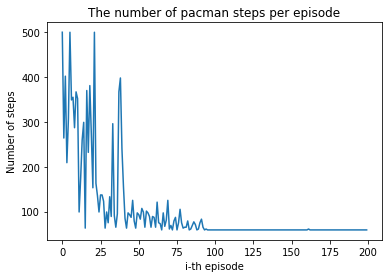

After learning the Q-table, the pacman finishes the game in 59 steps.


In [6]:
env = Environment(layout)

agent = RL_Agent(env, gamma=1, alpha=0.1)
learning_curve_data = agent.learn_Q()
_, steps = agent.navigate_optimally()
plot(learning_curve_data)
if steps < 2000:
    print(f'After learning the Q-table, the pacman finishes the game in {steps} steps.')
else:
    print('After learning the Q-table, there is no convergence to an effective policy ' + \
    'We have to try other hyperparameter values')

Episode 1 concluded with 500 moves for agent with (alpha=0.05, gamma=0.99)
Episode 21 concluded with 500 moves for agent with (alpha=0.05, gamma=0.99)
Episode 41 concluded with 170 moves for agent with (alpha=0.05, gamma=0.99)
Episode 61 concluded with 500 moves for agent with (alpha=0.05, gamma=0.99)
Episode 81 concluded with 500 moves for agent with (alpha=0.05, gamma=0.99)
Episode 101 concluded with 263 moves for agent with (alpha=0.05, gamma=0.99)
Episode 121 concluded with 57 moves for agent with (alpha=0.05, gamma=0.99)
Episode 141 concluded with 57 moves for agent with (alpha=0.05, gamma=0.99)
Episode 161 concluded with 57 moves for agent with (alpha=0.05, gamma=0.99)
Episode 181 concluded with 57 moves for agent with (alpha=0.05, gamma=0.99)
Episode 201 concluded with 57 moves for agent with (alpha=0.05, gamma=0.99)
Episode 221 concluded with 57 moves for agent with (alpha=0.05, gamma=0.99)
Episode 241 concluded with 57 moves for agent with (alpha=0.05, gamma=0.99)
Episode 261 

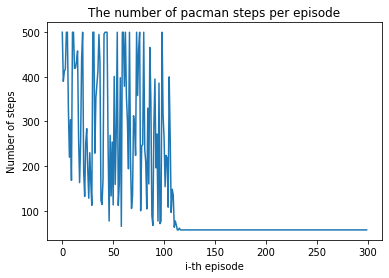

After learning the Q-table, the pacman finishes the game in 57 steps.


In [7]:
agent = RL_Agent(env, gamma=0.99, alpha=0.05, episode_num=300)
learning_curve_data = agent.learn_Q()
_, steps = agent.navigate_optimally()
plot(learning_curve_data)
if steps < 2000:
    print(f'After learning the Q-table, the pacman finishes the game in {steps} steps.')
else:
    print('After learning the Q-table, there is no convergence to an effective policy. ' +\
        'We have to try other hyperparameter values')

Episode 1 concluded with 463 moves for agent with (alpha=0.2, gamma=0.8)
Episode 21 concluded with 190 moves for agent with (alpha=0.2, gamma=0.8)
Episode 41 concluded with 257 moves for agent with (alpha=0.2, gamma=0.8)
Episode 61 concluded with 122 moves for agent with (alpha=0.2, gamma=0.8)
Episode 81 concluded with 68 moves for agent with (alpha=0.2, gamma=0.8)
Episode 101 concluded with 68 moves for agent with (alpha=0.2, gamma=0.8)
Episode 121 concluded with 68 moves for agent with (alpha=0.2, gamma=0.8)
Episode 141 concluded with 68 moves for agent with (alpha=0.2, gamma=0.8)
Episode 161 concluded with 68 moves for agent with (alpha=0.2, gamma=0.8)
Episode 181 concluded with 68 moves for agent with (alpha=0.2, gamma=0.8)


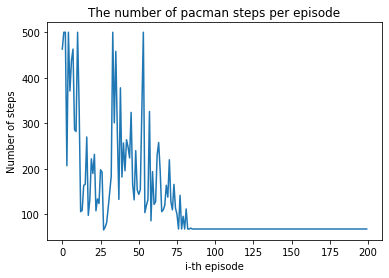

After learning the Q-table, the pacman finishes the game in 68 steps.


In [8]:
agent = RL_Agent(env, gamma=0.8, alpha=0.2)
learning_curve_data = agent.learn_Q()
_, steps = agent.navigate_optimally()
plot(learning_curve_data)
if steps < 2000:
    print(f'After learning the Q-table, the pacman finishes the game in {steps} steps.')
else:
    print('After learning the Q-table, there is no convergence to an effective policy. ' +\
        'We have to try other hyperparameter values')

We will now define a new environment using the grid given in the problem statement. Then, we will define different RL_agents with the different hyperparameters mentioned in the problem, using this environment as their argument.

Episode 1 concluded with 425 moves for agent with (alpha=0.05, gamma=0.25)
Episode 21 concluded with 151 moves for agent with (alpha=0.05, gamma=0.25)
Episode 41 concluded with 141 moves for agent with (alpha=0.05, gamma=0.25)
Episode 61 concluded with 219 moves for agent with (alpha=0.05, gamma=0.25)
Episode 81 concluded with 193 moves for agent with (alpha=0.05, gamma=0.25)
Episode 101 concluded with 114 moves for agent with (alpha=0.05, gamma=0.25)
Episode 121 concluded with 80 moves for agent with (alpha=0.05, gamma=0.25)
Episode 141 concluded with 98 moves for agent with (alpha=0.05, gamma=0.25)
Episode 161 concluded with 142 moves for agent with (alpha=0.05, gamma=0.25)
Episode 181 concluded with 126 moves for agent with (alpha=0.05, gamma=0.25)


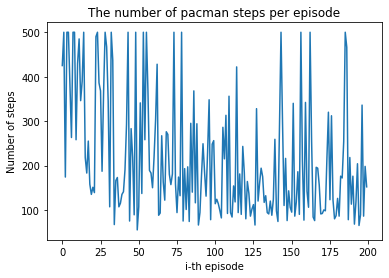

After learning the Q-table, there is no convergence to an effective policy. We have to try other hyperparameter values
------------------------------------------------------------------------------------------------------------------------------

Episode 1 concluded with 500 moves for agent with (alpha=0.1, gamma=0.25)
Episode 21 concluded with 270 moves for agent with (alpha=0.1, gamma=0.25)
Episode 41 concluded with 76 moves for agent with (alpha=0.1, gamma=0.25)
Episode 61 concluded with 188 moves for agent with (alpha=0.1, gamma=0.25)
Episode 81 concluded with 121 moves for agent with (alpha=0.1, gamma=0.25)
Episode 101 concluded with 86 moves for agent with (alpha=0.1, gamma=0.25)
Episode 121 concluded with 191 moves for agent with (alpha=0.1, gamma=0.25)
Episode 141 concluded with 98 moves for agent with (alpha=0.1, gamma=0.25)
Episode 161 concluded with 122 moves for agent with (alpha=0.1, gamma=0.25)
Episode 181 concluded with 98 moves for agent with (alpha=0.1, gamma=0.25)


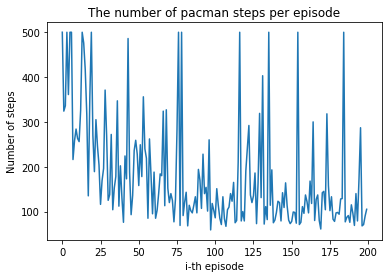

After learning the Q-table, there is no convergence to an effective policy. We have to try other hyperparameter values
------------------------------------------------------------------------------------------------------------------------------

Episode 1 concluded with 500 moves for agent with (alpha=0.5, gamma=0.25)
Episode 21 concluded with 315 moves for agent with (alpha=0.5, gamma=0.25)
Episode 41 concluded with 171 moves for agent with (alpha=0.5, gamma=0.25)
Episode 61 concluded with 500 moves for agent with (alpha=0.5, gamma=0.25)
Episode 81 concluded with 500 moves for agent with (alpha=0.5, gamma=0.25)
Episode 101 concluded with 500 moves for agent with (alpha=0.5, gamma=0.25)
Episode 121 concluded with 500 moves for agent with (alpha=0.5, gamma=0.25)
Episode 141 concluded with 500 moves for agent with (alpha=0.5, gamma=0.25)
Episode 161 concluded with 500 moves for agent with (alpha=0.5, gamma=0.25)
Episode 181 concluded with 500 moves for agent with (alpha=0.5, gamma=0.25)

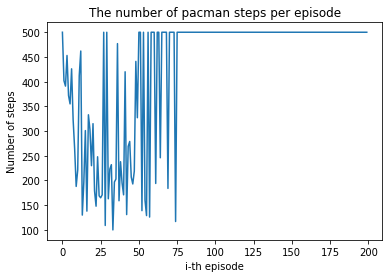

After learning the Q-table, there is no convergence to an effective policy. We have to try other hyperparameter values
------------------------------------------------------------------------------------------------------------------------------

Episode 1 concluded with 500 moves for agent with (alpha=0.05, gamma=0.5)
Episode 21 concluded with 236 moves for agent with (alpha=0.05, gamma=0.5)
Episode 41 concluded with 289 moves for agent with (alpha=0.05, gamma=0.5)
Episode 61 concluded with 81 moves for agent with (alpha=0.05, gamma=0.5)
Episode 81 concluded with 434 moves for agent with (alpha=0.05, gamma=0.5)
Episode 101 concluded with 90 moves for agent with (alpha=0.05, gamma=0.5)
Episode 121 concluded with 94 moves for agent with (alpha=0.05, gamma=0.5)
Episode 141 concluded with 142 moves for agent with (alpha=0.05, gamma=0.5)
Episode 161 concluded with 110 moves for agent with (alpha=0.05, gamma=0.5)
Episode 181 concluded with 64 moves for agent with (alpha=0.05, gamma=0.5)


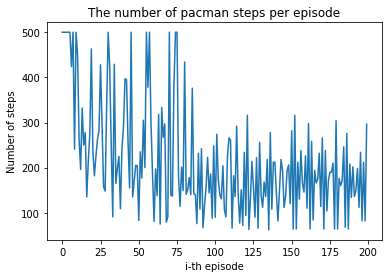

After learning the Q-table, the pacman finishes the games in 64 steps.
------------------------------------------------------------------------------------------------------------------------------

Episode 1 concluded with 500 moves for agent with (alpha=0.1, gamma=0.5)
Episode 21 concluded with 142 moves for agent with (alpha=0.1, gamma=0.5)
Episode 41 concluded with 102 moves for agent with (alpha=0.1, gamma=0.5)
Episode 61 concluded with 56 moves for agent with (alpha=0.1, gamma=0.5)
Episode 81 concluded with 64 moves for agent with (alpha=0.1, gamma=0.5)
Episode 101 concluded with 52 moves for agent with (alpha=0.1, gamma=0.5)
Episode 121 concluded with 52 moves for agent with (alpha=0.1, gamma=0.5)
Episode 141 concluded with 52 moves for agent with (alpha=0.1, gamma=0.5)
Episode 161 concluded with 52 moves for agent with (alpha=0.1, gamma=0.5)
Episode 181 concluded with 52 moves for agent with (alpha=0.1, gamma=0.5)


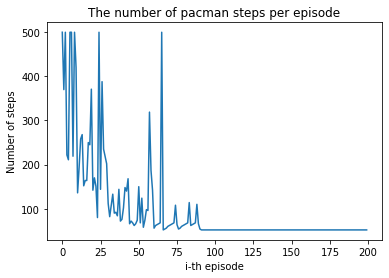

After learning the Q-table, the pacman finishes the games in 52 steps.
------------------------------------------------------------------------------------------------------------------------------

Episode 1 concluded with 500 moves for agent with (alpha=0.5, gamma=0.5)
Episode 21 concluded with 290 moves for agent with (alpha=0.5, gamma=0.5)
Episode 41 concluded with 63 moves for agent with (alpha=0.5, gamma=0.5)
Episode 61 concluded with 64 moves for agent with (alpha=0.5, gamma=0.5)
Episode 81 concluded with 58 moves for agent with (alpha=0.5, gamma=0.5)
Episode 101 concluded with 58 moves for agent with (alpha=0.5, gamma=0.5)
Episode 121 concluded with 58 moves for agent with (alpha=0.5, gamma=0.5)
Episode 141 concluded with 58 moves for agent with (alpha=0.5, gamma=0.5)
Episode 161 concluded with 58 moves for agent with (alpha=0.5, gamma=0.5)
Episode 181 concluded with 58 moves for agent with (alpha=0.5, gamma=0.5)


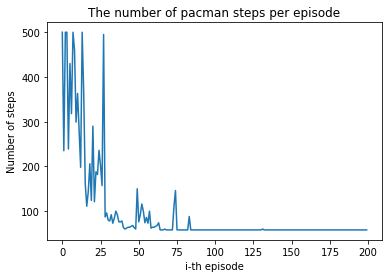

After learning the Q-table, the pacman finishes the games in 58 steps.
------------------------------------------------------------------------------------------------------------------------------

Episode 1 concluded with 500 moves for agent with (alpha=0.05, gamma=1.0)
Episode 21 concluded with 341 moves for agent with (alpha=0.05, gamma=1.0)
Episode 41 concluded with 161 moves for agent with (alpha=0.05, gamma=1.0)
Episode 61 concluded with 248 moves for agent with (alpha=0.05, gamma=1.0)
Episode 81 concluded with 162 moves for agent with (alpha=0.05, gamma=1.0)
Episode 101 concluded with 120 moves for agent with (alpha=0.05, gamma=1.0)
Episode 121 concluded with 62 moves for agent with (alpha=0.05, gamma=1.0)
Episode 141 concluded with 68 moves for agent with (alpha=0.05, gamma=1.0)
Episode 161 concluded with 72 moves for agent with (alpha=0.05, gamma=1.0)
Episode 181 concluded with 64 moves for agent with (alpha=0.05, gamma=1.0)


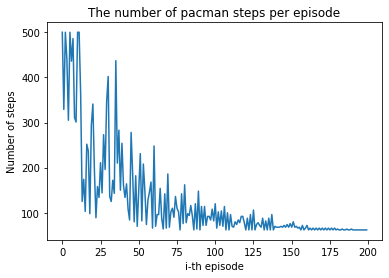

After learning the Q-table, the pacman finishes the games in 62 steps.
------------------------------------------------------------------------------------------------------------------------------

Episode 1 concluded with 500 moves for agent with (alpha=0.1, gamma=1.0)
Episode 21 concluded with 194 moves for agent with (alpha=0.1, gamma=1.0)
Episode 41 concluded with 107 moves for agent with (alpha=0.1, gamma=1.0)
Episode 61 concluded with 188 moves for agent with (alpha=0.1, gamma=1.0)
Episode 81 concluded with 120 moves for agent with (alpha=0.1, gamma=1.0)
Episode 101 concluded with 232 moves for agent with (alpha=0.1, gamma=1.0)
Episode 121 concluded with 88 moves for agent with (alpha=0.1, gamma=1.0)
Episode 141 concluded with 74 moves for agent with (alpha=0.1, gamma=1.0)
Episode 161 concluded with 66 moves for agent with (alpha=0.1, gamma=1.0)
Episode 181 concluded with 66 moves for agent with (alpha=0.1, gamma=1.0)


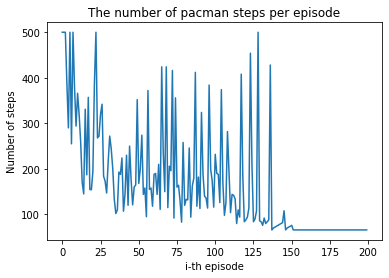

After learning the Q-table, the pacman finishes the games in 66 steps.
------------------------------------------------------------------------------------------------------------------------------

Episode 1 concluded with 500 moves for agent with (alpha=0.5, gamma=1.0)
Episode 21 concluded with 130 moves for agent with (alpha=0.5, gamma=1.0)
Episode 41 concluded with 62 moves for agent with (alpha=0.5, gamma=1.0)
Episode 61 concluded with 122 moves for agent with (alpha=0.5, gamma=1.0)
Episode 81 concluded with 82 moves for agent with (alpha=0.5, gamma=1.0)
Episode 101 concluded with 60 moves for agent with (alpha=0.5, gamma=1.0)
Episode 121 concluded with 60 moves for agent with (alpha=0.5, gamma=1.0)
Episode 141 concluded with 60 moves for agent with (alpha=0.5, gamma=1.0)
Episode 161 concluded with 60 moves for agent with (alpha=0.5, gamma=1.0)
Episode 181 concluded with 60 moves for agent with (alpha=0.5, gamma=1.0)


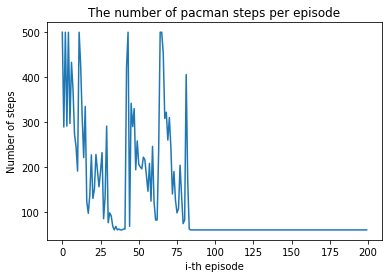

After learning the Q-table, the pacman finishes the games in 60 steps.
------------------------------------------------------------------------------------------------------------------------------



In [9]:
gamma_list = [0.25, 0.5, 1.0]
alpha_list = [0.05, 0.1, 0.5]

env = Environment(layout)

# For all combinations of the given gamma and alpha values
# we will create agents and test their Q-learning.
for gamma in gamma_list:
    for alpha in alpha_list:
        agent = RL_Agent(env, gamma=gamma, alpha=alpha)
        learning_curve_data = agent.learn_Q()
        _, steps = agent.navigate_optimally()
        plot(learning_curve_data)
        if steps < 2000:
            print(f'After learning the Q-table, the pacman finishes the games in {steps} steps.')
        else:
            print('After learning the Q-table, there is no convergence to an effective policy. ' + \
                'We have to try other hyperparameter values')
        print('------------------------------------------------------------------------------' +\
            '------------------------------------------------\n')
        
        

It is observable by the way of the plots and also by whether the values have converged or not that the following is true for our agent:

+ ($\alpha = 0.5$, $\gamma = 1$) and ($\alpha = 0.1$, $\gamma = 1$) almost always (I've yet seen them fail) are great hyperparameters that lead to convergence of close to optimal value.

+ ($\alpha = 0.1$, $\gamma = 0.5$), ($\alpha = 0.5$, $\gamma = 0.5$) and ($\alpha = 0.05$, $\gamma = 1$) will do a good job of converging to a close to optimal value a lot of the time.

+ The rest of the hyperparameters tested here don't converge in the current construction of the agent.

It seems apparent by observing the learning curves and checking convergence that in general, a higher rate like $1$ for the discount factor, $\gamma$, seems to result in convergance and a more effective Q-learning agent compared to lower values like $0.25$ and $0.5$. The reason for this phonomena could be that the Pac-Man game is highly complex, thus making future moves and rewards more important, leading to a need for a higher discount rate. Overall, for this currently implemented Q-learning algorithm, higher discount factors are recommended more.

In terms of the effects of the learning rate, a lower learning rate might cause more accuracy but will lead to slower learning process. This can cause a need of more episodes for convergence. Higher learning rates can lead faster learning but can also cause divergence and oscillation of the learning curve. Overall values between $0.05$ and $0.2$, seem to work well but this range can be varying depending on other hyperparameters like the minimum epsilon and discount factor values.

### **<span style="color:RGB(30, 190, 250)">2.5.** 

To obtain an appropriate Q-table and draw it, we run the Q-learning with some of the hyperparameters that converge and print the Q-table that's been stored in a dictionary that maps the states to np arrays of size 4.

Episode 1 concluded with 500 moves for agent with (alpha=0.2, gamma=0.8)
Episode 21 concluded with 83 moves for agent with (alpha=0.2, gamma=0.8)
Episode 41 concluded with 65 moves for agent with (alpha=0.2, gamma=0.8)
Episode 61 concluded with 211 moves for agent with (alpha=0.2, gamma=0.8)
Episode 81 concluded with 145 moves for agent with (alpha=0.2, gamma=0.8)
Episode 101 concluded with 59 moves for agent with (alpha=0.2, gamma=0.8)
Episode 121 concluded with 59 moves for agent with (alpha=0.2, gamma=0.8)
Episode 141 concluded with 59 moves for agent with (alpha=0.2, gamma=0.8)
Episode 161 concluded with 59 moves for agent with (alpha=0.2, gamma=0.8)
Episode 181 concluded with 59 moves for agent with (alpha=0.2, gamma=0.8)


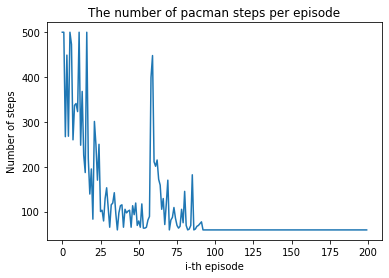

After learning the Q-table, the pacman finishes the game in 59 steps.


In [10]:
agent = RL_Agent(env, gamma=0.8, alpha=0.2)
learning_curve_data = agent.learn_Q()
_, steps = agent.navigate_optimally()
plot(learning_curve_data)
if steps < 2000:
    print(f'After learning the Q-table, the pacman finishes the game in {steps} steps.')
else:
    print('After learning the Q-table, there is no convergence to an effective policy. ' +\
        'We have to try other hyperparameter values')      

In [11]:
agent.Q_hat

{(0, 0, 0, 0, 0): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 1): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 2): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 3): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 4): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 5): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 6): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 7): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 8): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 9): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 10): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 11): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 12): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 13): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 14): array([0., 0., 0., 0.]),
 (0, 0, 0, 0, 15): array([0., 0., 0., 0.]),
 (0, 0, 0, 1, 0): array([0., 0., 0., 0.]),
 (0, 0, 0, 1, 1): array([0., 0., 0., 0.]),
 (0, 0, 0, 1, 2): array([0., 0., 0., 0.]),
 (0, 0, 0, 1, 3): array([0., 0., 0., 0.]),
 (0, 0, 0, 1, 4): array([0., 0., 0., 0.]),
 (0, 0, 0, 1, 5): array([0., 0., 0., 0.]),
 (0, 0, 0, 1, 6): array([0., 0., 0., 0.]),
 (0, 

Since the Q table is large, the display above only shows a part of it, but by expanding its display, you can observe the non-zero values in it. For instance:
+ `(0, 0, 3, 10, 10): array([ 0. , -0.2,  0. ,  0. ]),`
+ `(0, 0, 1, 2, 3): array([0.        , 4.68      , 0.72273542, 0.        ]),`
+ `(0, 0, 1, 2, 8): array([ 0. , -0.2,  1.8,  0. ]),`
+ `(0, 0, 1, 1, 2): array([ 0.        , 44.93283817,  7.21429788,  0.        ]),`


### <span style="color:RGB(30, 190, 250)">**2.6**

We will test the code on two new environments via an agent with $\gamma = 0.7$ and $\alpha = 0.4$. One environment will be simpler, the other will be more complex.

In [12]:
# Load the new grids (environments)
layout1 = [
    ['W', 'W', 'W', 'W', 'W', 'W'],
    ['W', 'D', 'E', 'E', 'D', 'W'],
    ['W', 'E', 'W', 'W', 'E', 'W'],
    ['W', 'A', 'E', 'D', 'E', 'W'],
    ['W', 'W', 'W', 'W', 'W', 'W']
]

layout2 = [
    ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
    ['W', 'D', 'E', 'E', 'D', 'W', 'D', 'D', 'D', 'W'],
    ['W', 'E', 'W', 'W', 'E', 'W', 'E', 'W', 'E', 'W'],
    ['W', 'D', 'E', 'D', 'E', 'D', 'E', 'E', 'D', 'W'],
    ['W', 'W', 'W', 'E', 'W', 'E', 'W', 'W', 'E', 'W'],
    ['W', 'D', 'E', 'D', 'E', 'D', 'E', 'D', 'D', 'W'],
    ['W', 'E', 'W', 'W', 'W', 'W', 'E', 'W', 'E', 'W'],
    ['W', 'D', 'D', 'D', 'E', 'D', 'D', 'E', 'D', 'W'],
    ['W', 'A', 'E', 'E', 'E', 'E', 'E', 'E', 'E', 'W'],
    ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']
]

# First environment
env1 = Environment(layout1)
env2 = Environment(layout2)

agent1 = RL_Agent(env1, gamma=0.7, alpha=0.7, episode_num=500, min_epsilon=0)
agent2 = RL_Agent(env2, gamma=0.7, alpha=0.7, episode_num=500, min_epsilon=0)  

Episode 1 concluded with 46 moves for agent with (alpha=0.7, gamma=0.7)
Episode 21 concluded with 30 moves for agent with (alpha=0.7, gamma=0.7)
Episode 41 concluded with 18 moves for agent with (alpha=0.7, gamma=0.7)
Episode 61 concluded with 16 moves for agent with (alpha=0.7, gamma=0.7)
Episode 81 concluded with 12 moves for agent with (alpha=0.7, gamma=0.7)
Episode 101 concluded with 14 moves for agent with (alpha=0.7, gamma=0.7)
Episode 121 concluded with 10 moves for agent with (alpha=0.7, gamma=0.7)
Episode 141 concluded with 34 moves for agent with (alpha=0.7, gamma=0.7)
Episode 161 concluded with 10 moves for agent with (alpha=0.7, gamma=0.7)
Episode 181 concluded with 8 moves for agent with (alpha=0.7, gamma=0.7)
Episode 201 concluded with 18 moves for agent with (alpha=0.7, gamma=0.7)
Episode 221 concluded with 8 moves for agent with (alpha=0.7, gamma=0.7)
Episode 241 concluded with 10 moves for agent with (alpha=0.7, gamma=0.7)
Episode 261 concluded with 12 moves for agent 

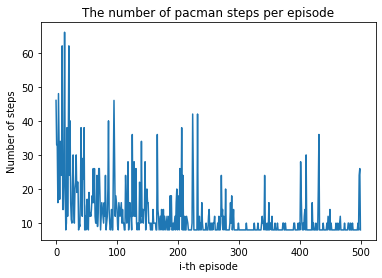

After learning the Q-table, the pacman finishes the game in 8 steps.


In [13]:
learning_curve_data = agent1.learn_Q()
_, steps = agent1.navigate_optimally()
plot(learning_curve_data)
if steps < 2000:
    print(f'After learning the Q-table, the pacman finishes the game in {steps} steps.')
else:
    print('After learning the Q-table, there is no convergence to an effective policy. ' +\
        'We have to try other hyperparameter values')      

Episode 1 concluded with 488 moves for agent with (alpha=0.7, gamma=0.7)
Episode 21 concluded with 45 moves for agent with (alpha=0.7, gamma=0.7)
Episode 41 concluded with 43 moves for agent with (alpha=0.7, gamma=0.7)
Episode 61 concluded with 43 moves for agent with (alpha=0.7, gamma=0.7)
Episode 81 concluded with 43 moves for agent with (alpha=0.7, gamma=0.7)
Episode 101 concluded with 43 moves for agent with (alpha=0.7, gamma=0.7)
Episode 121 concluded with 43 moves for agent with (alpha=0.7, gamma=0.7)
Episode 141 concluded with 43 moves for agent with (alpha=0.7, gamma=0.7)
Episode 161 concluded with 43 moves for agent with (alpha=0.7, gamma=0.7)
Episode 181 concluded with 43 moves for agent with (alpha=0.7, gamma=0.7)
Episode 201 concluded with 43 moves for agent with (alpha=0.7, gamma=0.7)
Episode 221 concluded with 43 moves for agent with (alpha=0.7, gamma=0.7)
Episode 241 concluded with 43 moves for agent with (alpha=0.7, gamma=0.7)
Episode 261 concluded with 43 moves for age

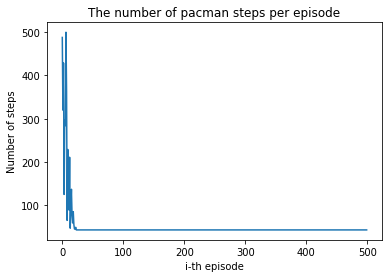

After learning the Q-table, the pacman finishes the game in 43 steps.


In [16]:
learning_curve_data = agent2.learn_Q()
_, steps = agent2.navigate_optimally()
plot(learning_curve_data)
if steps < 2000:
    print(f'After learning the Q-table, the pacman finishes the game in {steps} steps.')
else:
    print('After learning the Q-table, there is no convergence to an effective policy. ' +\
        'We have to try other hyperparameter values')      

As for the results, the Q-learning algorithm implemented here by using the appropriate hyperparameters, works well for both of the environments and converges to values that are similar to the optimal value (In the case of the first environment, it almost always converges on the optimal value).